In [2]:
import glob
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut
from skimage import exposure

In [14]:
DIR_DCM = '/volb/vinbig/train'

image_list = sorted(glob.glob(DIR_DCM + '/*.dicom'))

print('Images in the list:', len(image_list))

Images in the list: 15000


In [6]:
# utility function
def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    
    data = data - np.min(data)
        
    return data

In [20]:
# image chosen in the list
INDEX = 5

In [21]:
# show metadata in DCM file
img_dcm = pydicom.dcmread(image_list[INDEX])
print(img_dcm)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 156
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 000ae00eb3942d27e0b97903dd563a6e
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: ''
(0002, 0016) Source Application Entity Title     AE: 'VITREA1'
-------------------------------------------------
(0010, 0040) Patient's Sex                       CS: 'O'
(0010, 1010) Patient's Age                       AS: 'Y'
(0010, 1020) Patient's Size                      DS: None
(0010, 1030) Patient's Weight                    DS: None
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation         

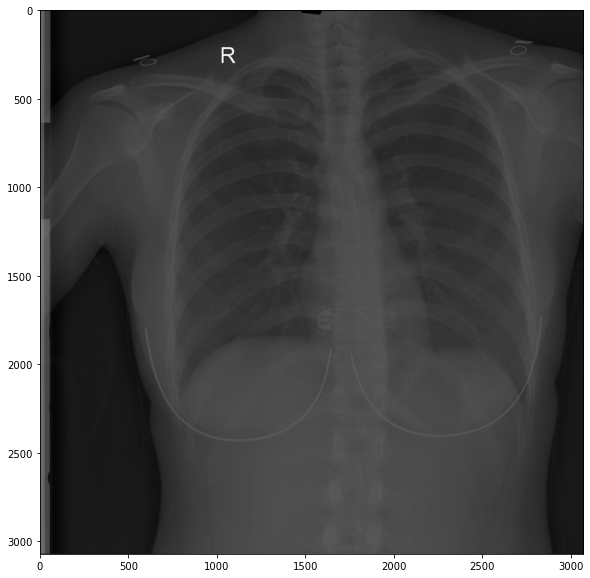

In [22]:
# without normalization
plt.figure(figsize=(10,10))
plt.imshow(img_dcm.pixel_array, cmap='gray');

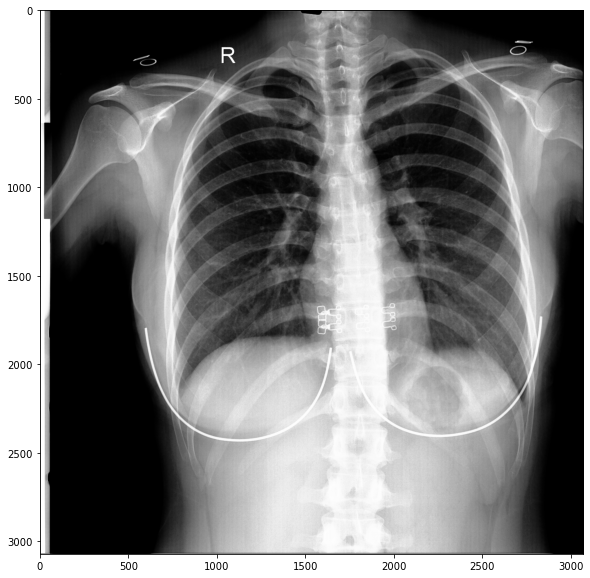

In [23]:
# with histogram equalization
img = read_xray(image_list[INDEX])
img = exposure.equalize_hist(img)

plt.figure(figsize = (10,10))
plt.imshow(img, 'gray');

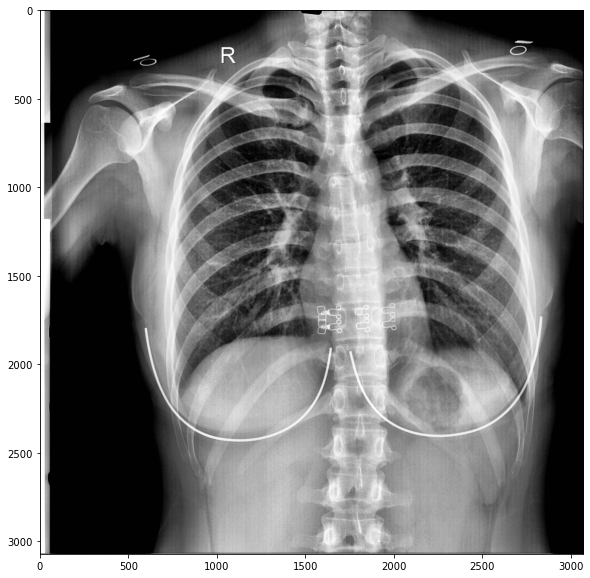

In [24]:
# CLAHE normalization
img = read_xray(image_list[INDEX])
img = exposure.equalize_adapthist(img/np.max(img))

plt.figure(figsize = (10,10))
plt.imshow(img, 'gray');